In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
df = pd.DataFrame({"x0" : x[:, 0], "x1" : x[:, 1], "y" : y})

In [7]:
df.head()

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
df.shape

(1000, 3)

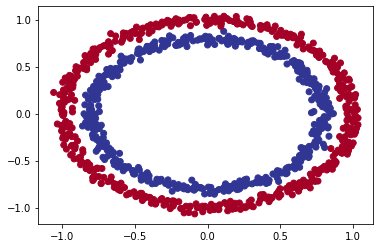

In [9]:
plt.scatter(df['x0'], df['x1'], c=df['y'], cmap=plt.cm.RdYlBu)
plt.show()

In [10]:
x.shape, y.shape

((1000, 2), (1000,))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 8s 22ms/step - loss: 0.6933 - accuracy: 0.4737 - val_loss: 0.6975 - val_accuracy: 0.4550
Epoch 2/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.5113 - val_loss: 0.6999 - val_accuracy: 0.4550
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6826 - accuracy: 0.5113 - val_loss: 0.6962 - val_accuracy: 0.4550
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6781 - accuracy: 0.5113 - val_loss: 0.6929 - val_accuracy: 0.4550
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6697 - accuracy: 0.5300 - val_loss: 0.6780 - val_accuracy: 0.4550
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6495 - accuracy: 0.5312 - val_loss: 0.6506 - val_accuracy: 0.6150
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6021 - accuracy: 0.7075 - val_loss: 0.5824 - val_accuracy: 0.9150
Epoch 8/20
25/25 

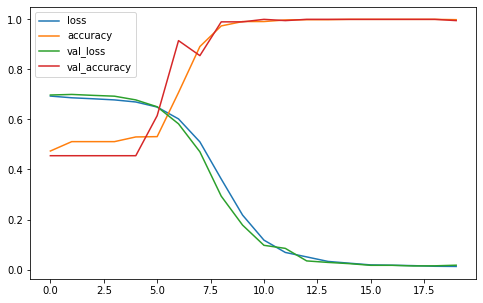

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [15]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9950


[0.017374472692608833, 0.9950000047683716]

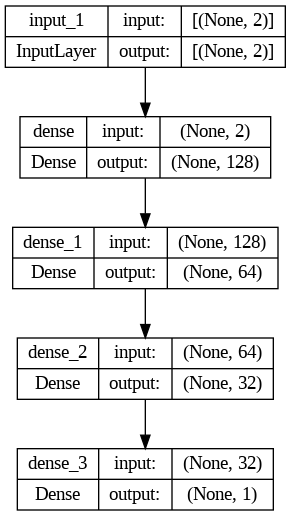

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [28]:
y_pred

array([[7.68724782e-03],
       [8.79257350e-05],
       [8.33744705e-01],
       [9.98440206e-01],
       [1.05199397e-04],
       [9.75032162e-04],
       [9.97084558e-01],
       [9.51035321e-01],
       [9.98011092e-04],
       [9.96947110e-01],
       [4.67261905e-03],
       [4.67198482e-03],
       [9.90152419e-01],
       [9.94668424e-01],
       [1.58309728e-01],
       [9.86899257e-01],
       [9.97855961e-01],
       [9.88487124e-01],
       [6.10026938e-04],
       [1.07864777e-04],
       [1.50965046e-04],
       [1.25416070e-02],
       [9.97121632e-01],
       [9.98844385e-01],
       [3.25391185e-04],
       [9.98284042e-01],
       [5.11041086e-04],
       [9.75391828e-04],
       [9.98443782e-01],
       [1.66595855e-05],
       [1.54638285e-04],
       [9.98319089e-01],
       [2.51073837e-02],
       [1.71375216e-03],
       [9.32006955e-01],
       [9.33645606e-01],
       [9.47188497e-01],
       [2.43211128e-02],
       [1.71319945e-04],
       [9.96658683e-01],


In [29]:
y_pred = tf.round(y_pred)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.99      1.00       109

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



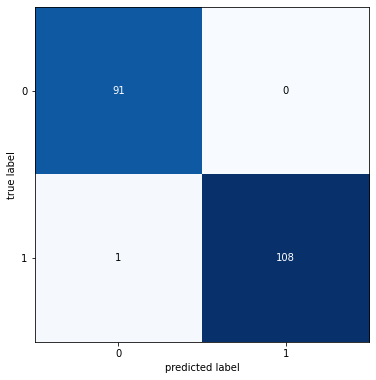

In [46]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), figsize=(6,7))
plt.show()

In [17]:
# create a toy tensor and apply sigmoid activation on it
linear_x = tf.cast(tf.range(-10, 10), dtype=tf.float32)

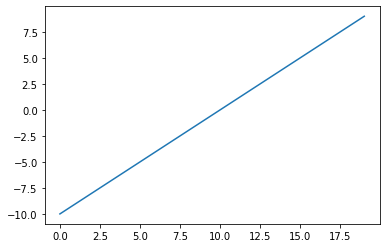

In [18]:
plt.plot(linear_x)
plt.show()

In [19]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [20]:
sigmoid_x = sigmoid(linear_x)

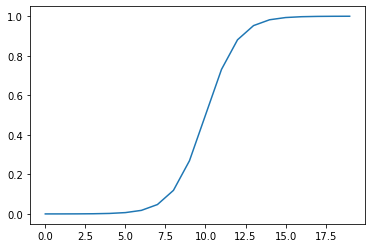

In [21]:
plt.plot(sigmoid_x)
plt.show()

In [22]:
# relu activation
def relu(x):
  return tf.maximum(0, x)

In [23]:
relu_x = relu(linear_x)

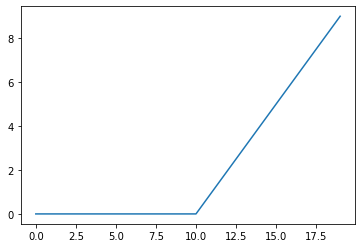

In [24]:
plt.plot(relu_x)
plt.show()